# Ethereum Fraud detection

dataset: https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset

reference: https://www.kaggle.com/code/piotrbaejewski/ethereum-fraud-detection-pca-and-undersampling

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

### Load the dataset

In [57]:
df = pd.read_csv('./transaction_dataset.csv').drop(columns=['Unnamed: 0'])

In [58]:
df = df.drop(columns=['Index'])
df

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

In [60]:
print(df.describe())

              FLAG  Avg min between sent tnx  Avg min between received tnx  \
count  9841.000000               9841.000000                   9841.000000   
mean      0.221421               5086.878721                   8004.851184   
std       0.415224              21486.549974                  23081.714801   
min       0.000000                  0.000000                      0.000000   
25%       0.000000                  0.000000                      0.000000   
50%       0.000000                 17.340000                    509.770000   
75%       0.000000                565.470000                   5480.390000   
max       1.000000             430287.670000                 482175.490000   

       Time Diff between first and last (Mins)      Sent tnx  Received Tnx  \
count                             9.841000e+03   9841.000000   9841.000000   
mean                              2.183333e+05    115.931714    163.700945   
std                               3.229379e+05    757.226361   

### Exploratory Data Analysis

1. Check for missing values

In [61]:
print(df.isnull().sum())

Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contra

In [62]:
df = df.dropna()

2. Distribution of the target variable

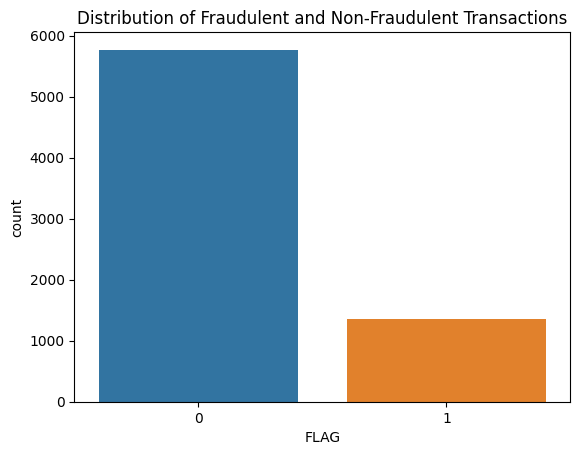

In [63]:
sns.countplot(x='FLAG', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

3. Correlation heatmap

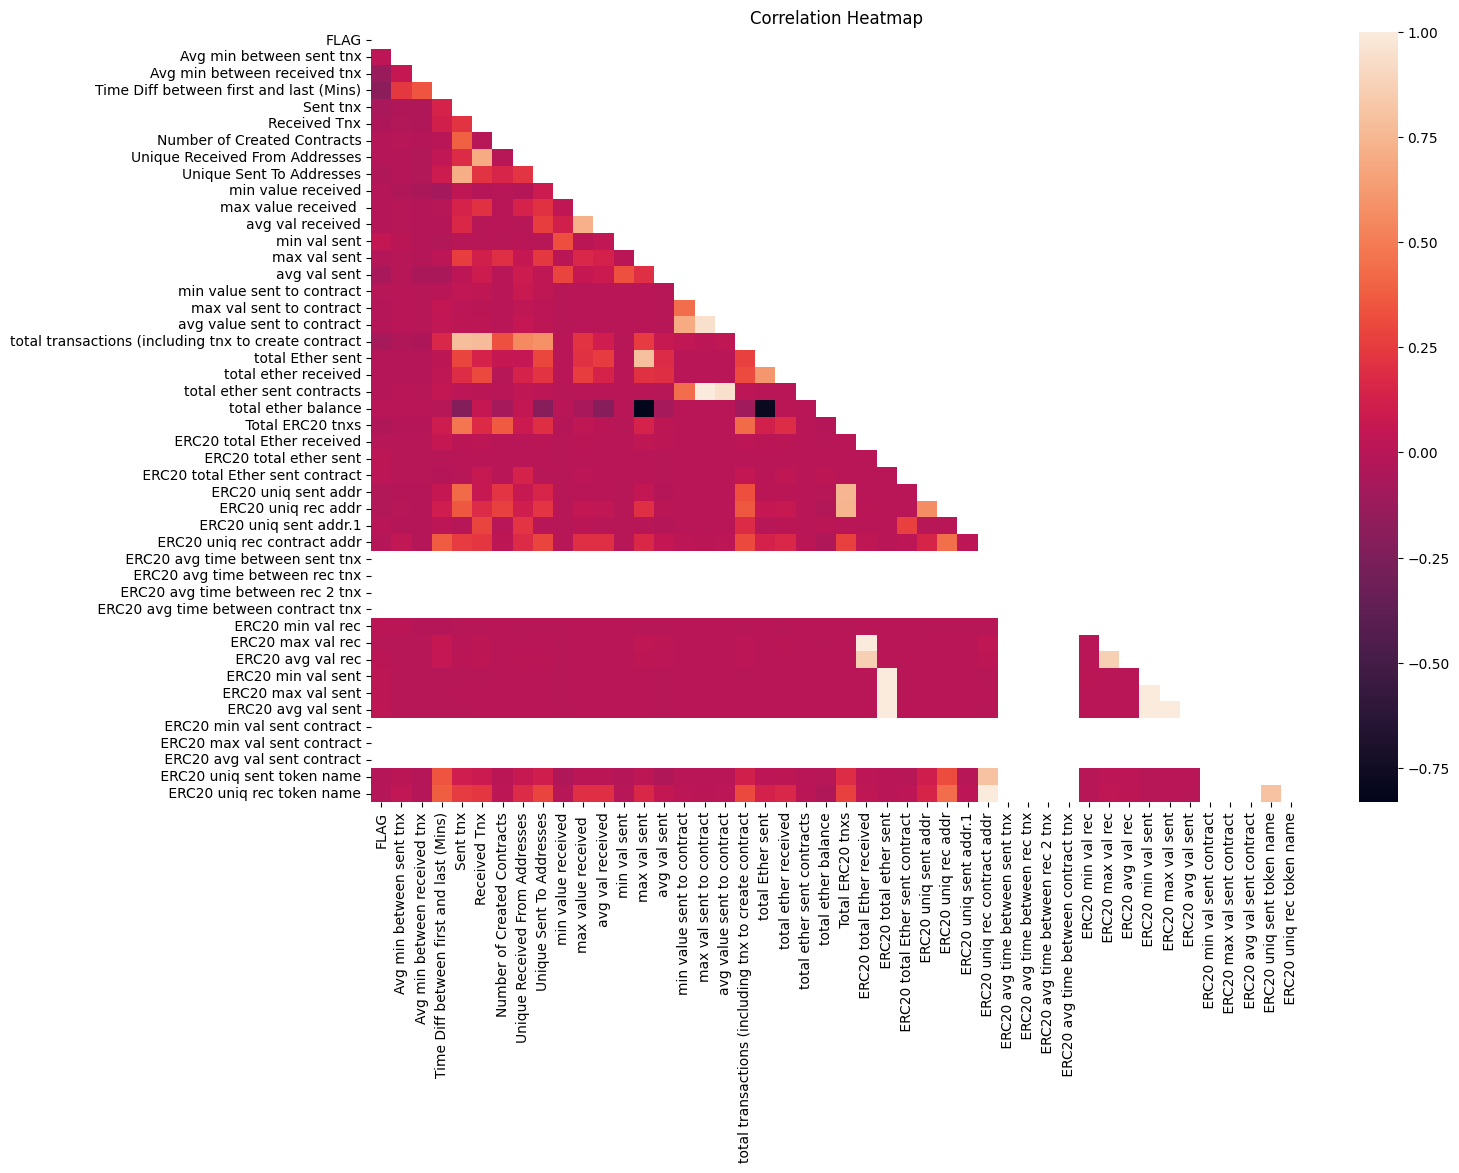

In [64]:
numeric_data = df.drop(columns=['Address', ' ERC20 most sent token type', ' ERC20_most_rec_token_type'])
plt.figure(figsize=(15, 10))
corr_matrix = numeric_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=False)
plt.title('Correlation Heatmap')
plt.show()

High correlation between certain features:
- 'Total Ether Sent' and 'Total Ether Received' show a high positive correlation. Similarly, 'ERC20 total ether sent contract' and 'ERC20 total ether recieved' also exhibit a high correlation.
- 'Sent tnx', 'Received tnx', and 'Total Transactions' are highly correlated with each other, indicating that accounts with many transactions tend to have high values in these features across the board.

Correlation with the target variable (FLAG):
- The FLAG variable shows weaker correlations with most of the features. However, certain features do exhibit some degree of correlation with the target variable.

In [65]:
high_correlation_threshold = 0.7
high_corr_pairs = corr_matrix[abs(corr_matrix) > high_correlation_threshold]

In [66]:
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > high_correlation_threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

In [67]:
features_to_drop = list(to_drop)
print("Features to drop due to high correlation:", features_to_drop)

selected_features = numeric_data.drop(columns=features_to_drop + ['FLAG']).columns.tolist()
selected_features.append('FLAG')
data_selected = df[selected_features]

Features to drop due to high correlation: [' ERC20 avg val sent', ' ERC20 avg val rec', 'total Ether sent', 'avg val received', 'total ether balance', ' ERC20 uniq rec token name', ' ERC20 uniq sent addr', ' ERC20 uniq rec addr', 'total ether sent contracts', 'total transactions (including tnx to create contract', ' ERC20 min val sent', ' ERC20 max val rec', ' ERC20 max val sent', 'avg value sent to contract', 'Unique Sent To Addresses', ' ERC20 uniq sent token name']


In [68]:
data_selected

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,min value received,max value received,min val sent,...,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,FLAG
0,844.26,1093.71,704785.63,721,89,0,40,0.000000,45.806785,0.000000,...,58.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
1,12709.07,2958.44,1218216.73,94,8,0,5,0.000000,2.613269,0.000000,...,7.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
3,10219.60,15785.09,397555.90,25,9,0,7,0.000000,500.000000,0.000000,...,11.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
4,36.61,10707.77,382472.42,4598,20,1,7,0.000000,12.802411,0.000000,...,27.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
5,9900.12,375.48,20926.68,2,3,0,2,0.724148,4.813776,4.166800,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,0.00,0.00,0.00,0,0,0,0,0.000000,0.000000,0.000000,...,2.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1
9836,12635.10,631.39,58748.48,4,13,0,11,0.004082,12.000000,0.465461,...,2.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1
9837,0.00,0.00,0.00,0,0,0,0,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,13.37,0.0,0.0,0.0,1
9838,2499.44,2189.29,261601.88,67,43,0,31,0.001078,21.310000,0.004000,...,5.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1


### Split the dataset

1. Split the dataset into training and testing sets

In [69]:
X = data_selected.drop(columns=['FLAG'])
y = data_selected['FLAG']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [71]:
X_train

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,min value received,max value received,min val sent,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract
7548,5.50,65823.31,460801.68,7,7,0,6,1.004000,31.300000,1.002883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
7841,0.00,0.00,4955.05,1,1,0,1,1.000000,1.000000,0.999139,...,0.0,1.0,0.0,0.0,0.0,0.0,1.337,0.0,0.0,0.0
8059,0.00,0.00,0.00,0,0,0,0,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.337,0.0,0.0,0.0
1731,22.18,0.00,66.55,3,1,0,1,101.000000,101.000000,0.913300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2207,10015.17,31639.41,414951.87,13,9,0,2,0.030397,4.814564,0.000000,...,0.0,7.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,2158.98,1468.02,956847.73,348,140,0,53,0.010000,20.007000,0.000000,...,0.0,102.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
3956,2.19,3633.97,14544.65,4,4,0,4,1.000000,45.500000,0.999406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
9342,0.00,83.92,251.75,0,3,0,3,0.500000,0.967956,0.000000,...,0.0,2.0,0.0,0.0,0.0,0.0,1.337,0.0,0.0,0.0
5994,0.00,0.00,4.33,1,1,0,1,1.000000,1.000000,0.999071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


2. Apply SMOTE to handle imbalanced dataset

In [72]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

3. Scale the features

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

### Model Training and comparison

In [74]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

Logistic Regression:

Confusion Matrix:
[[608 547]
 [ 26 244]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.53      0.68      1155
           1       0.31      0.90      0.46       270

    accuracy                           0.60      1425
   macro avg       0.63      0.72      0.57      1425
weighted avg       0.84      0.60      0.64      1425



Support Vector Machine:

Confusion Matrix:
[[810 345]
 [ 22 248]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82      1155
           1       0.42      0.92      0.57       270

    accuracy                           0.74      1425
   macro avg       0.70      0.81      0.70      1425
weighted avg       0.87      0.74      0.77      1425



Random Forest:

Confusion Matrix:
[[1155    0]
 [  11  259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99  

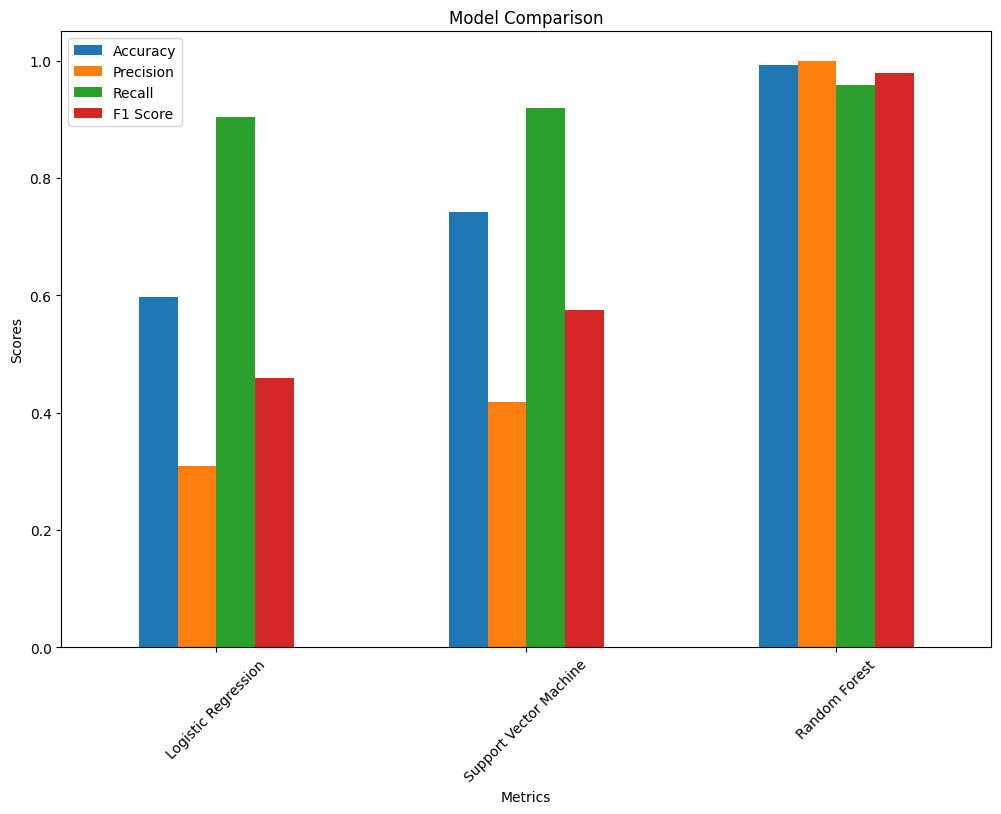

In [79]:
results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_smote)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    print(f"{model_name}:\n")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

# Compare the results
results_df = pd.DataFrame(results).T
print(results_df)

# Plot the comparison
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

### Conclusion

Random Forest is observed to be the best model for this fraud detection task. It has the highest scores across all evaluation metrics, indicating it is the most effective in identifying fraudulent transactions.